In [6]:
import numpy as np
import utilities as mz 

In [2]:
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])

env = mz.Maze(maze)

### Solve the MDP problem with dynamic programming

In [3]:
# Finite horizon
horizon = 20

V, policy= mz.dynamic_programming(env,horizon);

# Simulate (b)
method = 'DynProg';
start  = (0,0,6,5);
path = env.simulate(start, policy, method);
print(path)



[(0, 0, 6, 5), (0, 1, 5, 5), (1, 1, 5, 6), (2, 1, 6, 6), (3, 1, 6, 5), (4, 1, 6, 4), (4, 2, 6, 5), (4, 3, 5, 5), (4, 4, 4, 5), (4, 5, 5, 5), (4, 6, 4, 5), (4, 7, 4, 6), (5, 7, 5, 6), (6, 7, 5, 5), (6, 6, 5, 4), (6, 5, 5, 5), (6, 5, 5, 6), (6, 5, 4, 6), (6, 5, 4, 7), (6, 5, 3, 7), (6, 5, 2, 7)]


reached exit


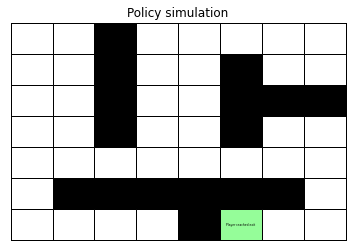

In [4]:
mz.animate_solution(maze, path)

In [ ]:
method = 'DynProg';
start  = (0,0,6,5);
probabilities = []

for T in range(1,31):
    V, policy= mz.dynamic_programming(env,T);
    prob = env.compute_probability_exiting(start, policy, method, 10000, T)
    probabilities.append(prob)

print(probabilities)

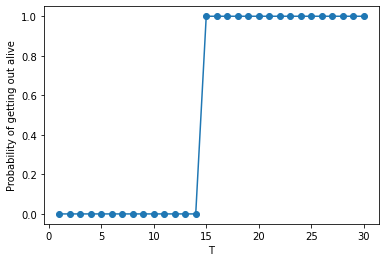

In [7]:
import matplotlib.pyplot as plt
plt.plot(range(1,31), probabilities, marker='o')

# naming the x axis
plt.xlabel('T')
# naming the y axis
plt.ylabel('Probability of getting out alive')
 
# function to show the plot
plt.show()

### Value iteration

In [8]:
# Discount Factor 
gamma   = 29/30; 
# Accuracy treshold 
epsilon = 0.0001;

#env.REWARD_STEP = -1
V, policy = mz.value_iteration(env, gamma, epsilon)

In [16]:
method = 'ValIter';
start  = (0,0,6,5);
probabilities = []
z = np.random.geometric(p=1/30, size=10000)



prob = env.compute_probability_exiting(start, policy, method, 10000, z)
print('probability:',prob)

probability: 0.6192
